In [267]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from fake_useragent import UserAgent
import time
import random
from datetime import datetime

import re

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.support import expected_conditions as EC

import os
import urllib, io
from io import StringIO 
from PIL import Image
import string

import pickle

## URLs

In [291]:
ua = UserAgent()
user_agent = {'User-agent': ua.random}

# chromedriver = r"C:\Users\ejfel\chromedriver" # path to the chromedriver executable
# os.environ["webdriver.chrome.driver"] = chromedriver
# driver = webdriver.Chrome(chromedriver)

driver = webdriver.Chrome(executable_path=r"C:\Users\ejfel\chromedriver")

In [20]:
driver.get(url ='https://www.yelp.com/search?find_desc=Pizza&find_loc=Chicago%2C%20IL&sortby=rating&start=0')
metal_soup = BeautifulSoup(driver.page_source, 'lxml')
restaurants = metal_soup.find_all('div', class_ = re.compile("businessName."))
restaurants[0]

<div class="businessName__09f24__3Wql2 display--inline-block__09f24__3L1EB border-color--default__09f24__1eOdn"><div class="border-color--default__09f24__1eOdn"><h4 class="css-1l5lt1i"><span class="css-1pxmz4g"><a class="css-166la90" href="/adredir?ad_business_id=AqJM4ZZqKnYU5z4E8DruhA&amp;campaign_id=m0_BtRh55ByUk4in2Qr0VA&amp;click_origin=search_results&amp;placement=above_search&amp;placement_slot=0&amp;redirect_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fhappy-camper-old-town-chicago&amp;request_id=02fadabc1fbdd70f&amp;signature=fb36f2e8cca16fb849631a32baf93789f0ee1c1f71a68651e85a524cf5699770&amp;slot=0" name="Happy Camper - Old Town" rel="" target="">Happy Camper - Old Town</a></span></h4></div></div>

In [22]:
url = restaurants[0].find('a').get('href')
url

'/adredir?ad_business_id=AqJM4ZZqKnYU5z4E8DruhA&campaign_id=m0_BtRh55ByUk4in2Qr0VA&click_origin=search_results&placement=above_search&placement_slot=0&redirect_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fhappy-camper-old-town-chicago&request_id=02fadabc1fbdd70f&signature=fb36f2e8cca16fb849631a32baf93789f0ee1c1f71a68651e85a524cf5699770&slot=0'

In [52]:
name = restaurants[3].find('a').get_text('name')
check = name.lower().replace("’", '')
name.lower().replace("'", "").replace(' ','-')
'https://www.yelp.com/biz_photos/'+name.lower().replace("'", "").replace(' -','').replace(' ','-')+'?tab=pizza'
check

'bobs pizza'

In [2]:
# Chicago function
def get_links(start,stop):
    values = {}
    for i in range(start,stop+1,10):
        ua = UserAgent()
        user_agent = {'User-agent': ua.random}
        time.sleep(1+.2*random.randint(1,10))
        page_num = i
        if page_num%25==0:
            print(page_num)
        driver.get(url = f'https://www.yelp.com/search?find_desc=Pizza&find_loc=Chicago%2C%20IL&sortby=rating&start={page_num}')
        search_soup = BeautifulSoup(driver.page_source, 'lxml')
        shops = search_soup.find_all('div', class_ = re.compile("businessName."))
#         urls.append(search_soup.get('href'))
        try:
            for shop in shops:
                try:
                    rest_url = 'https://www.yelp.com'+shop.find('a').get('href')
                    name = shop.find('a').get_text('name')
                    photo_url = 'https://www.yelp.com/biz_photos/'+name.lower().replace("’", '').replace(' -','').replace(' ','-')+'-chicago?tab=pizza'
                    values[name] = [rest_url,photo_url]
                except:
                    continue
        except:
            continue
    df = pd.DataFrame(values).T
    df = df.rename(columns={0:'rest_url', 1:'photo_url'})
    df = df.reset_index().rename(columns={'index':'name'})
    return df

In [238]:
# North Shore function
def get_links_E(start,stop):
    values = {}
    for i in range(start,stop+1,10):
        ua = UserAgent()
        user_agent = {'User-agent': ua.random}
        time.sleep(1+.2*random.randint(1,10))
        page_num = i
        if page_num%25==0:
            print(page_num)
            driver.get(url = f'https://www.yelp.com/search?find_desc=pizza&find_loc=evanston&start={page_num}')
            search_soup = BeautifulSoup(driver.page_source, 'lxml')
            shops = search_soup.find_all('div', class_ = re.compile("businessName."))
    #         urls.append(search_soup.get('href'))
            try:
                for shop in shops:
                    try:
                        rest_url = 'https://www.yelp.com'+shop.find('a').get('href')
                        name = shop.find('a').get_text('name')
                        photo_url = 'https://www.yelp.com/biz_photos/'+name.lower().replace("’", '').replace(' -','').replace(' ','-')+'-chicago?tab=pizza'
                        values[name] = [rest_url,photo_url]
                    except:
                        continue
            except:
                continue
    df = pd.DataFrame(values).T
    df = df.rename(columns={0:'rest_url', 1:'photo_url'})
    df = df.reset_index().rename(columns={'index':'name'})
    return df



In [274]:
# Chicagoland
def get_links_all(start,stop):
    values = {}
    for i in range(start,stop+1,10):
        ua = UserAgent()
        user_agent = {'User-agent': ua.random}
        time.sleep(1+.2*random.randint(1,10))
        page_num = i
        if page_num%25==0:
            print(page_num)
        searches = [f'https://www.yelp.com/search?find_desc=Pizza&find_loc=Chicago%2C%20IL&sortby=rating&start={page_num}', f'https://www.yelp.com/search?find_desc=pizza&find_loc=evanston&start={page_num}', f'https://www.yelp.com/search?find_desc=pizza&find_loc=elmhurst&start={page_num}', f'https://www.yelp.com/search?find_desc=pizza&find_loc=naperville&start={page_num}',f'https://www.yelp.com/search?find_desc=pizza&find_loc=tinley%20park&start={page_num}',f'https://www.yelp.com/search?find_desc=Pizza&find_loc=Schaumburg%2C%20IL&sortby=rating&start={page_num}']
        for search in searches:
            driver.get(url = search)
            search_soup = BeautifulSoup(driver.page_source, 'lxml')
            shops = search_soup.find_all('div', class_ = re.compile("businessName."))
    #         urls.append(search_soup.get('href'))
            try:
                for shop in shops:
                    try:
                        rest_url = 'https://www.yelp.com'+shop.find('a').get('href')
                        name = shop.find('a').get_text('name')
                        photo_url = 'https://www.yelp.com/biz_photos/'+name.lower().replace("’", '').replace(' -','').replace(' ','-')+'-chicago?tab=pizza'
                        values[name] = [rest_url,photo_url]
                    except:
                        continue
            except:
                continue
    df = pd.DataFrame(values).T
    df = df.rename(columns={0:'rest_url', 1:'photo_url'})
    df = df.reset_index().rename(columns={'index':'name'})
    return df

In [279]:
# driver.quit()

In [281]:
area_url = get_links_all(0,200)
area_url.sample(20)

0
50
100
150
200


,name,rest_url,photo_url
823,Hotspot Grill,https://www.yelp.com/biz/hotspot-grill-chicago...,https://www.yelp.com/biz_photos/hotspot-grill-...
71,Homeslice,https://www.yelp.com/adredir?ad_business_id=qb...,https://www.yelp.com/biz_photos/homeslice-chic...
674,Blissful Banana Café,https://www.yelp.com/biz/blissful-banana-caf%C...,https://www.yelp.com/biz_photos/blissful-banan...
900,Yofresh Yogurt Cafe,https://www.yelp.com/biz/yofresh-yogurt-cafe-e...,https://www.yelp.com/biz_photos/yofresh-yogurt...
613,100 South Chophouse,https://www.yelp.com/biz/100-south-chophouse-e...,https://www.yelp.com/biz_photos/100-south-chop...
237,Antonio Ristorante Italiano,https://www.yelp.com/biz/antonio-ristorante-it...,https://www.yelp.com/biz_photos/antonio-ristor...
406,Freddy’s Pizza,https://www.yelp.com/biz/freddys-pizza-cicero?...,https://www.yelp.com/biz_photos/freddys-pizza-...
164,Sorrento Pizza,https://www.yelp.com/biz/sorrento-pizza-chicag...,https://www.yelp.com/biz_photos/sorrento-pizza...
228,At’s A Nice Pizza & Pasta,https://www.yelp.com/biz/ats-a-nice-pizza-and-...,https://www.yelp.com/biz_photos/ats-a-nice-piz...
275,Papa’s Pizza Place,https://www.yelp.com/biz/papas-pizza-place-woo...,https://www.yelp.com/biz_photos/papas-pizza-pl...


In [275]:
area_url.iloc[670]

name                                              Omaha Steaks
rest_url     https://www.yelp.com/biz/omaha-steaks-orland-p...
photo_url    https://www.yelp.com/biz_photos/omaha-steaks-c...
Name: 670, dtype: object

In [239]:
more_url = get_links_E(0,500)
more_url.head()

0
50
100
150
200
250
300
350
400
450
500


,name,rest_url,photo_url
0,Pizza Patrón,https://www.yelp.com/adredir?ad_business_id=Ej...,https://www.yelp.com/biz_photos/pizza-patrón-c...
1,Nueva Italy Pizzeria,https://www.yelp.com/adredir?ad_business_id=MT...,https://www.yelp.com/biz_photos/nueva-italy-pi...
2,Bob’s Pizza,https://www.yelp.com/biz/bobs-pizza-evanston?o...,https://www.yelp.com/biz_photos/bobs-pizza-chi...
3,Union Squared - Evanston,https://www.yelp.com/biz/union-squared-evansto...,https://www.yelp.com/biz_photos/union-squared-...
4,Lou Malnati’s Pizzeria,https://www.yelp.com/biz/lou-malnatis-pizzeria...,https://www.yelp.com/biz_photos/lou-malnatis-p...


In [5]:
url_df = get_links(0,500)
url_df.head()

0
50
100
150
200
250
300
350
400
450
500


,name,rest_url,photo_url
0,Pizza Patrón,https://www.yelp.com/adredir?ad_business_id=Ej...,https://www.yelp.com/biz_photos/pizza-patrón-c...
1,Rosati’s Pizza,https://www.yelp.com/adredir?ad_business_id=yt...,https://www.yelp.com/biz_photos/rosatis-pizza-...
2,Pizza City USA,https://www.yelp.com/biz/pizza-city-usa-chicag...,https://www.yelp.com/biz_photos/pizza-city-usa...
3,Bob’s Pizza,https://www.yelp.com/biz/bobs-pizza-evanston?o...,https://www.yelp.com/biz_photos/bobs-pizza-chi...
4,Stix n Brix Wood Fired Pizza,https://www.yelp.com/biz/stix-n-brix-wood-fire...,https://www.yelp.com/biz_photos/stix-n-brix-wo...


In [246]:
s=pd.concat([url_df,more_url],keys=['chi','more'])

s.assign(cumcount=s.groupby([s.name,s.rest_url,s.photo_url]).cumcount()).drop_duplicates(keep=False).reset_index(level=0,drop=True).drop('cumcount',1)

,name,rest_url,photo_url
0,Pizza Patrón,https://www.yelp.com/adredir?ad_business_id=Ej...,https://www.yelp.com/biz_photos/pizza-patrón-c...
1,Rosati’s Pizza,https://www.yelp.com/adredir?ad_business_id=yt...,https://www.yelp.com/biz_photos/rosatis-pizza-...
2,Pizza City USA,https://www.yelp.com/biz/pizza-city-usa-chicag...,https://www.yelp.com/biz_photos/pizza-city-usa...
3,Bob’s Pizza,https://www.yelp.com/biz/bobs-pizza-evanston?o...,https://www.yelp.com/biz_photos/bobs-pizza-chi...
4,Stix n Brix Wood Fired Pizza,https://www.yelp.com/biz/stix-n-brix-wood-fire...,https://www.yelp.com/biz_photos/stix-n-brix-wo...
...,...,...,...
209,Sea Ranch,https://www.yelp.com/biz/sea-ranch-evanston?os...,https://www.yelp.com/biz_photos/sea-ranch-chic...
210,Convito Cafe & Market,https://www.yelp.com/biz/convito-cafe-and-mark...,https://www.yelp.com/biz_photos/convito-cafe-&...
211,Einstein Bros,https://www.yelp.com/biz/einstein-bros-evansto...,https://www.yelp.com/biz_photos/einstein-bros-...
212,Dear Franks of Niles,https://www.yelp.com/biz/dear-franks-of-niles-...,https://www.yelp.com/biz_photos/dear-franks-of...


In [249]:
more_url.head(50)

,name,rest_url,photo_url
0,Pizza Patrón,https://www.yelp.com/adredir?ad_business_id=Ej...,https://www.yelp.com/biz_photos/pizza-patrón-c...
1,Nueva Italy Pizzeria,https://www.yelp.com/adredir?ad_business_id=MT...,https://www.yelp.com/biz_photos/nueva-italy-pi...
2,Bob’s Pizza,https://www.yelp.com/biz/bobs-pizza-evanston?o...,https://www.yelp.com/biz_photos/bobs-pizza-chi...
3,Union Squared - Evanston,https://www.yelp.com/biz/union-squared-evansto...,https://www.yelp.com/biz_photos/union-squared-...
4,Lou Malnati’s Pizzeria,https://www.yelp.com/biz/lou-malnatis-pizzeria...,https://www.yelp.com/biz_photos/lou-malnatis-p...
5,Union Pizzeria-Evanston,https://www.yelp.com/biz/union-pizzeria-evanst...,https://www.yelp.com/biz_photos/union-pizzeria...
6,Paninos Pizza,https://www.yelp.com/biz/paninos-pizza-evansto...,https://www.yelp.com/biz_photos/paninos-pizza-...
7,Lefty’s Pizza Kitchen,https://www.yelp.com/biz/leftys-pizza-kitchen-...,https://www.yelp.com/biz_photos/leftys-pizza-k...
8,La Rosa Pizza On Golf,https://www.yelp.com/biz/la-rosa-pizza-on-golf...,https://www.yelp.com/biz_photos/la-rosa-pizza-...
9,Napolita Pizzeria & Wine Bar,https://www.yelp.com/biz/napolita-pizzeria-and...,https://www.yelp.com/biz_photos/napolita-pizze...


In [293]:
with open('pizza_urls.pickle', 'wb') as to_write:
    pickle.dump(url_df, to_write)
with open('big_pizza_urls.pickle', 'wb') as to_write:
    pickle.dump(area_url, to_write)

In [8]:
driver.get(url = url_df.photo_url[49])
pizza_pics = BeautifulSoup(driver.page_source, 'lxml')

In [9]:
pizzas_ims = pizza_pics.find('ul', class_="photo-box-grid photo-box-grid--highlight photo-box-grid--small clearfix lightbox-media-parent").find_all('img')[0:25]

In [15]:
len(pizzas_ims)

7

## Restaurant Details

In [148]:
def get_stats(df):
    values = {}
    for i in range(len(df)):
        ua = UserAgent()
        user_agent = {'User-agent': ua.random}
        time.sleep(1+.2*random.randint(1,10))
        row_num = i
        if row_num%25 == 0:
            print(row_num)
        driver.get(url = df.rest_url[row_num])
        search_soup = BeautifulSoup(driver.page_source, 'lxml')
        
        name = df.name[row_num]
        text = search_soup.find('address').find_all('span')
        try:
            street = text[0].get_text()
        except IndexError:
            street = ''
        try:
            zipcode = text[1].get_text()
        except IndexError: 
            zipcode = ''
        address = street+', '+zipcode
        
        try:
            rating_desc = search_soup.select('[aria-label*=rating]')[0]['aria-label']
            rating_num = float(rating_desc.split(' ')[0])
        except IndexError:
            rating_num = -10
        try:
            reviews = pizzawords_from_url(df.rest_url[row_num])
        except:
            try:
                reviews = pizzawords_from_url(df.rest_url[row_num])
            except:
                try:
                    reviews = pizzawords_from_url(df.rest_url[row_num])
                except:
                    reviews = 'Missing'

        values[name] = [address, rating_num, reviews]
        
    df = pd.DataFrame(values).T
    df = df.rename(columns={0:'address', 1:'stars', 2:'pizza_words'})
    df = df.reset_index().rename(columns={'index':'name'})
    return df

In [283]:
big_info_df = get_stats(area_url)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925


In [151]:
info_df = get_stats(url_df)
info_df.sample(12)

0
25
50
75
100
125
150
175
200


,name,address,stars,pizza_words
38,Coalfire,"3707 N Southport Ave, Chicago, IL 60613",4,Amazing pizza! I would urge you to try the 'nd...
1,Rosati’s Pizza,"176 N Wells St, Chicago, IL 60606",3.5,Missing
64,Ricobene’s,"252 W 26th St, Chicago, IL 60616",4,If you haven't tried their famous Italian Brea...
115,Easy Street,"3750 N Central Ave, Chicago, IL 60634",4,"Some of our food favorites include pizza, wing..."
207,Casati’s Modern Italian,"444 W Fullerton Pkwy, Chicago, IL 60614",4,I guess all the pizza will be as good as long ...
193,Pizzaboy Pizzeria,"6694 N Northwest Hwy, Chicago, IL 60631",4,I ordered a sausage pizza thin crust which is ...
54,Pizzeria Serio,"1708 W Belmont Ave, Chicago, IL 60657",4,I don't have the strongest pizza opinions in t...
129,Freddy’s Pizza,"1600 S 61st Ave, Cicero, IL 60804",4.5,Soups are amazing as well and so is the pizza....
172,Da Pizza Dude,"Chicago, IL 60642,",4,I hired Da Pizza Dude for my son's birthday pa...
107,Eataly Chicago,"43 E Ohio St, Chicago, IL 60611",4,We shared a bottle of a white (I don't remembe...


In [202]:
## A few reviews didn't load right, I think from sponsored links. loaded individually or dropped later
info_df['pizza_words'] = np.where((info_df.name == 'Pizzeria Flora'), pizzawords_from_url(url = 'https://www.yelp.com/biz/pizzeria-flora-chicago?osq=Pizzeria+Flora'),info_df.pizza_words)
info_df[info_df.name == 'Pizzeria Flora']

info_df[info_df.pizza_words == '']

,name,address,stars,pizza_words
41,Amedicano,"1001 W North Ave, Chicago, IL 60642",-10,
135,Meatball Bliss,"3517 N Spaulding Ave, Chicago, IL 60618",4.5,
147,Cracked on Milwaukee,"1359 N Milwaukee Ave, Chicago, IL 60622",4.5,
197,Franco’s Ristorante,"300 W 31st St, Chicago, IL 60616",4.5,


In [288]:
big_info_df.sample(20)

,name,address,stars,pizza_words
199,Old Town Pizza Co,"109 E Roosevelt Rd, Lombard, IL 60148",3.5,Double dough pizza is amazingly cheese with de...
431,Euro Crepes and Pizzeria,"4740 Main St, Lisle, IL 60532",4.5,We love Euro Crepes and Pizzeria and drive fro...
721,7-Eleven,"6350 W 135th St, Palos Heights, IL 60463",3.5,Best pizza ever!!!!!!
317,Artistic Cuisine,"16 S Bothwell St, Palatine, IL 60067",4,I usually don't like pizza but the new del bos...
563,Dat Pizza Dough,"Evanston, IL 60202,",-10,
609,Life Cafe,"5300 Old Orchard Rd, Skokie, IL 60077",5,"They have just about everything from burgers, ..."
481,Mario’s Pizza,"911 Oak St, North Aurora, IL 60542",4,Best pizza you can get in the North Aurora are...
863,Lu and Ton’s Wieners,"111 S Lombard Ave, Addison, IL 60101",4,This is a late review.I got a pizza puff from ...
369,Gyros Planet & Taqueria,"1903 Church St, Evanston, IL 60201",4,I was drawn in to this place because I saw the...
707,Che Figata,"2155 City Gate Ln, Ste 103",3.5,"Pizza with Italian sausage, brocolini, and asp..."


In [260]:
big_info_df[big_info_df.name == 'Evanston Grill']

,name,address,stars,pizza_words
570,Evanston Grill,"1047 Chicago Ave, Ste B",4,


In [284]:
# with open('pizza_details.pickle', 'wb') as to_write:
#     pickle.dump(info_df, to_write)
with open('more_pizza_details.pickle', 'wb') as to_write:
    pickle.dump(big_info_df, to_write)

In [ ]:
## Find Address for each business

for num in range(2,4):
    url = url_df.rest_url[num]
    driver.get(url = url)
    review_soup = BeautifulSoup(driver.page_source, 'lxml')
    
    print(address)
    
## Find rating for each business
for num in range(2,4):
    url = url_df.rest_url[num]
    driver.get(url = url)
    review_soup = BeautifulSoup(driver.page_source, 'lxml')
    

## Images

In [65]:
ims = []
for pie in pizzas:
    
    try:
        link = (pie['srcset'].split()[0])
        if link is not None:
            urllib.request.urlretrieve(link, 'im.png')
            im = Image.open('im.png')
            ims.append(im)
        else: 
            continue
    except:
        continue

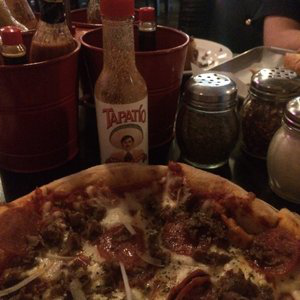

In [25]:
pizzas = pizza_pics.find('ul', class_="photo-box-grid photo-box-grid--highlight photo-box-grid--small clearfix lightbox-media-parent").find_all('img')   
pie_link = pizzas[0]['srcset'].split()[0]
urllib.request.urlretrieve(pie_link, 'im.png')
im = Image.open('im.png')
Image.open('im.png')

In [289]:
def get_pizza_pics(url, num_pics=10):
    driver.get(url = url)
    pizza_soup = BeautifulSoup(driver.page_source, 'lxml')
    pizzas = pizza_soup.find('ul', class_="photo-box-grid photo-box-grid--highlight photo-box-grid--small clearfix lightbox-media-parent").find_all('img')   
    if num_pics>len(pizzas):
        print('There were fewer than requested images for',url)
        num_pics=len(pizzas)
    pizzas = pizzas[0:num_pics]
    pizza_pics = []
    counterB = 0
    for pie in pizzas:
        try:
            link = (pie['srcset'].split()[0])
            if link is not None:
                splita = url.split('/')
                start = splita[-1].split('?')[0]
                path = r"C:\Users\ejfel\pizza_images\full_image_set\data"
                full_path = os.path.join(path, start+'_'+str(counterB)+'.jpeg')
                urllib.request.urlretrieve(link, full_path)
                im = Image.open(full_path)
                pizza_pics.append(im)
                counterB += 1
            else: 
                continue
        except:
            continue
    return pizza_pics

In [292]:
# Scrape URLs from DF to find images from yet
# bigyelp_ims
# areayelp_ims = []
# for yelp in area_url.photo_url:
#     try:
#         bigyelp_ims += get_pizza_pics(yelp)
#     except AttributeError:
#         pass
# len(areayelp_ims)

chicagoland_ims = []
for yelp in area_url.photo_url:
    try:
        chicagoland_ims += get_pizza_pics(yelp)
    except AttributeError:
        pass
len(chicagoland_ims)

There were fewer than requested images for https://www.yelp.com/biz_photos/armands-pizzeria-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/nancys-pizza-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/mod-pizza-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/gigios-pizzeria-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/sarpinos-pizzeria-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/pizza-y-pan-pa-ya-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/beggars-pizza-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/aurelios-pizza-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/eastern-style-pizza-chicago?tab=pizza
There were fewer than 

2497

In [237]:
# Scrape URLs from DF to find images from yet

yelp_ims = []
for yelp in url_df.photo_url:
    try:
        yelp_ims += get_pizza_pics(yelp)
    except AttributeError:
        pass
len(yelp_ims)


There were fewer than requested images for https://www.yelp.com/biz_photos/pizza-y-pan-pa-ya-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/stunods-pizzeria-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/montis-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/ricobenes-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/nancys-pizza-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/lauras-pizza-and-pasta-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/via-carducci-la-sorella-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/gigios-pizzeria-chicago?tab=pizza
There were fewer than requested images for https://www.yelp.com/biz_photos/waldo-cooneys-pizza-chicago?tab=pizza
There were fewe

1676

In [271]:
more_url

,name,rest_url,photo_url
0,Pizza Patrón,https://www.yelp.com/adredir?ad_business_id=Ej...,https://www.yelp.com/biz_photos/pizza-patrón-c...
1,Nueva Italy Pizzeria,https://www.yelp.com/adredir?ad_business_id=MT...,https://www.yelp.com/biz_photos/nueva-italy-pi...
2,Bob’s Pizza,https://www.yelp.com/biz/bobs-pizza-evanston?o...,https://www.yelp.com/biz_photos/bobs-pizza-chi...
3,Union Squared - Evanston,https://www.yelp.com/biz/union-squared-evansto...,https://www.yelp.com/biz_photos/union-squared-...
4,Lou Malnati’s Pizzeria,https://www.yelp.com/biz/lou-malnatis-pizzeria...,https://www.yelp.com/biz_photos/lou-malnatis-p...
...,...,...,...
209,Sea Ranch,https://www.yelp.com/biz/sea-ranch-evanston?os...,https://www.yelp.com/biz_photos/sea-ranch-chic...
210,Convito Cafe & Market,https://www.yelp.com/biz/convito-cafe-and-mark...,https://www.yelp.com/biz_photos/convito-cafe-&...
211,Einstein Bros,https://www.yelp.com/biz/einstein-bros-evansto...,https://www.yelp.com/biz_photos/einstein-bros-...
212,Dear Franks of Niles,https://www.yelp.com/biz/dear-franks-of-niles-...,https://www.yelp.com/biz_photos/dear-franks-of...


In [233]:
# trial_images = get_pizza_pics(url_df.photo_url[0],10)
splita = url_df.photo_url[0].split('/')
splita[-1].split('?')[0]


'pizza-patrón-chicago'

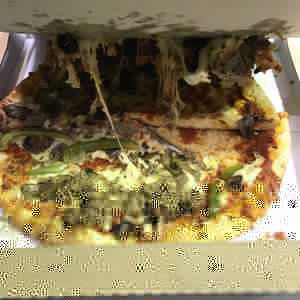

In [214]:
trial_images[6]

## Reviews

In [39]:
url = url_df.rest_url[48]

In [46]:
# pizza_soup.find_all('p')

In [51]:
# trial = pizza_soup.find_all('p',class_='css-gdi06s')
trial = pizza_soup.find('span',width='0')
print(trial)


None


In [136]:
#This function goes to the recommended reviews on a Yelp page, finds the reviews, breaks into sentences, and takes all the sentences that contain the word pizza.

def pizzawords_from_url(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    reviews = soup.find(string='Recommended Reviews').find_parent('section')
    rev_list = []
    for review in reviews.select('div[aria-label$="star rating"]'):
        text = review.find_next('span', lang=True).text
        if pizzawords.search(text):
            temp = [rating_num, date, text]
            rev_list.append(temp)
        else:
            pass
    pizza_sentences = ''
    for num in range(len(rev_list)):
        for item in re.split(r'(?<=[^A-Z].[.?!]) +(?=[A-Z])', rev_list[num][2]):
            if pizzawords.search(item):
                pizza_sentences += item + ' '
            else:
                pass
    return pizza_sentences

def pizzawords_from_soup(soup):
    reviews = soup.find(string='Recommended Reviews').find_parent('section')
    rev_list = []
    for review in reviews.select('div[aria-label$="star rating"]'):
        text = review.find_next('span', lang=True).text
        if pizzawords.search(text):
            temp = [rating_num, date, text]
            rev_list.append(temp)
        else:
            pass
    pizza_sentences = ''
    for num in range(len(rev_list)):
        for item in re.split(r'(?<=[^A-Z].[.?!]) +(?=[A-Z])', rev_list[num][2]):
            if pizzawords.search(item):
                pizza_sentences += item + ' '
            else:
                pass
    return pizza_sentences

In [218]:
pizza_words = pizzawords_from_url(url='https://www.yelp.com/biz/apart-pizza-company-chicago-2')
pizza_words

'The thin crust makes the pizza so "light" hahaha. The service at this place was absolutely terrible and the pizza wasn\'t any better than any other place. I worked at a pizza place for almost three years so I am usually incredibly sympathetic and patient with others in these situations, but this experience was just too bad. I called and asked if they had gluten free pizza and they said yes which was great! They came early, after about half an hour and I took the pizza up to my dorm. I opened the box and I saw the most despicable pizza I have ever seen. I called them, after the delivery man seemed to be fumbling around his phone for a few minutes and not making any progress, and they said they didn\'t have a knife to cut gluten free pizzas and it said that on the website. Why sell gluten free pizza if they can\'t even invest in a knife to cut it?!I just said okay and went upstairs and cut my pizza with a plastic fork; safe to say it didn\'t go well. The pizza itself was fine I guess bu

In [85]:
test_reviews[0][2]

'THE VIBES ARE RIGHT. Visited paradise park a couple months ago with a friend. Indoor seating was still not allowed BUT this place designed the best outdoor seating environment I\'ve seen so far. It essentially feels like indoor eating but with some tropical/fun vibes. Temperature + ID checks were done before entering. I was seated right away. This place takes social distancing very seriously. Before you enter, the hostess goes over the rules (what I can remember: wear your mask if you get up from your seat + whenever your server comes by). Once you are seated, your server repeats the rules and there is a printed version pasted on each table! Love this. We started off with a salad called "NORTH AVE"which is topped with mandarin oranges, avocado, bacon bits, onions, gorgonzola, and lemon poppy seed dressing. My friend and I are both vegetarians so we asked to cancel the bacon bits which was no issue at all. Ugh this salad was yummy! The tangy, sweet mandarin oranges paired with the lemo

In [99]:
re.split(r'(?<=[^A-Z].[.?!]) +(?=[A-Z])', test_reviews[0][2])[0]

'THE VIBES ARE RIGHT. Visited paradise park a couple months ago with a friend.'

In [109]:
pizza_centric = ''
for num in range(len(test_reviews)):
    for item in re.split(r'(?<=[^A-Z].[.?!]) +(?=[A-Z])', test_reviews[num][2]):
        if pizzawords.search(item):
            pizza_centric += item + ' '
        else:
            pass
pizza_centric

'They have a section dedicated for veggie pizzas (10 total options). The pizza is tasty (more of a thicker crust NY style), and so are the apps and sandwiches.The one thing I\'m truly addicted to on their menu are the "jalapeno homies". Thank you all.Food/Drinks: Their known for their pizzas so get one or two! The pesto sauce, italian sausage, roasted red pepper pizza is spot on. Tables were also socially distanced and we felt very comfortable eating here given the careful precautions and the outdoor setting.For food, we ordered a Sammilton pizza and goat stix for the table, both of which really lived up to the hype! However, I do feel that their pizzas are worth every penny as they are flavorful, unique, and baked to perfection! So I\'ll definitely be bringing my dog.The pizza is SO good. I got the lew-wow pizza and yes I love pineapple on my pizza. I don\'t know why its nothing special My friend and and were looking for a Friday nite Covid 19 precautions compliant place with outdoor 

In [65]:
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
reviews = soup.find(string='Recommended Reviews').find_parent('section')
rev_list = []
for review in reviews.select('div[aria-label$="star rating"]'):
    rating_desc = review['aria-label']
    rating_num = float(rating_desc.split(' ')[0])
    date = review.find_next('span').text
    text = review.find_next('span', lang=True).text
    temp = [rating_num, date, text]
    rev_list.append(temp)

In [70]:
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
reviews = soup.find(string='Recommended Reviews').find_parent('section')
rev_list = []
for review in reviews.select('div[aria-label$="star rating"]'):
    text = review.find_next('span', lang=True).text
    if pizzawords.search(text):
        rating_desc = review['aria-label']
        rating_num = float(rating_desc.split(' ')[0])
        date = review.find_next('span').text
    
        temp = [rating_num, date, text]
        rev_list.append(temp)
    else:
        pass

In [73]:
rev_list[3]

[4.0,
 '12/8/2020',
 'If you\'re looking for great food and an instagram-worthy backdrop, this is the place to check out! A group of friends and I came here for brunch on a beautiful warm day in September (rare, I know), and we were seated upstairs on their outdoor patio. Upon entering, we were each handed a free glass of champagne, which added to the free-spirited "paradise" ambiance of the place. Their staff were extremely friendly and pleasant. Given their COVID precautions, all staff members wore face masks and guests were asked to only remove masks while eating. Tables were also socially distanced and we felt very comfortable eating here given the careful precautions and the outdoor setting.For food, we ordered a Sammilton pizza and goat stix for the table, both of which really lived up to the hype! I ordered an avocado toast from their brunch menu, which came with a side salad. Although delicious, I did not find their avocado toast to be particularly unique or complex for it to b

In [60]:
test_string =  'i loved everything pizza about this place especially with covid shutting most things down, it was nice that everything was on point. the food tastes great and came out piping hot. the staff were professional and wearing PPE. they are enclosed for the winter with heaters everywhere so it was very comfortable inside. its the perfect place for a blogger or for a traveler taking pics. the drinks were great and were creatively presented. you do have to make reservations ahead of time if you want to sit inside the train car'
test_string = test_string.lower()

In [69]:
pizzawords = re.compile('pizza|pizzas|za') 

if pizzawords.search(rev_list[2][2]):
                        print('Yes')
else:
                        print('No')

Yes


In [163]:
url = url_df.rest_url[3]
driver.get(url = url)
review_soup = BeautifulSoup(driver.page_source, 'lxml')

image search on Bob's Pizza for pizza: https://www.yelp.com/biz_photos/bobs-pizza-chicago?tab=pizza
image search on Forno Rosso for pizza: https://www.yelp.com/biz_photos/forno-rosso-pizzeria-napoletana-chicago?tab=pizza